# Data and Sampling Distributions


In [3]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In [4]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

Tentukan jalur ke kumpulan data. jika Anda tidak menyimpan data Anda di direktori yang sama dengan kode, sesuaikan nama jalurnya.

In [5]:
LOANS_INCOME_CSV = DATA / 'loans_income.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'

### Figure 2.1
Population versus sample

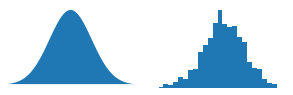

In [8]:
np.random.seed(seed=1)
x = np.linspace(-3, 3, 300)
xsample = stats.norm.rvs(size=1000)

fig, axes = plt.subplots(ncols=2, figsize=(5, 1.5))

ax = axes[0]
ax.fill(x, stats.norm.pdf(x))
ax.set_axis_off()
ax.set_xlim(-3, 3)

ax = axes[1]
ax.hist(xsample, bins= 30)
ax.set_axis_off()
ax.set_xlim(-3, 3)
ax.set_position
# Plt.subplot_adjust(left= , bottom=0, right=1, top=1, wspace=0, hspace=0)

plt.show()


## Sampling Distribution of a Statistic

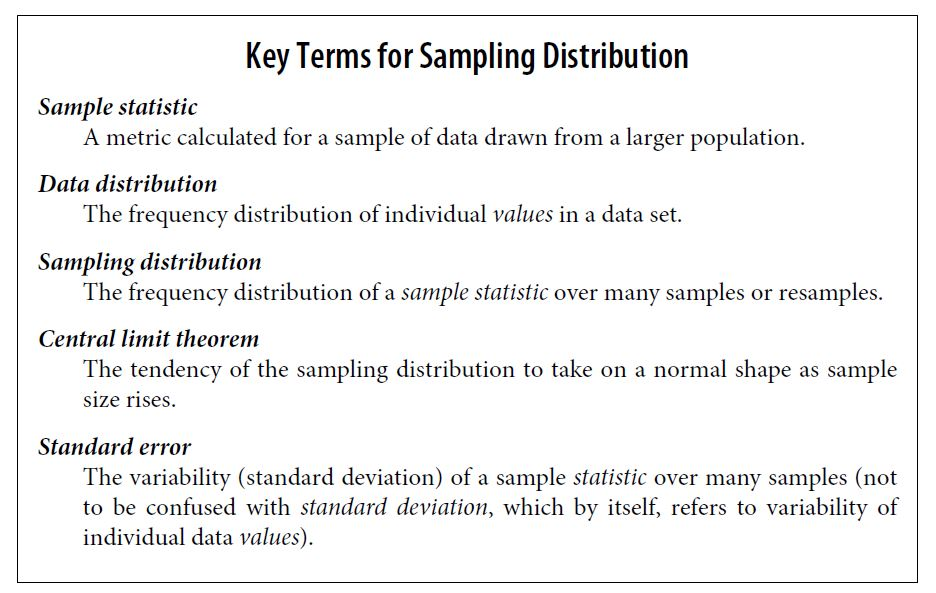

In [11]:
loans_income = pd.read_csv(LOANS_INCOME_CSV, squeeze=True)

sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',    
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5'
})
sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20'
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())


         income  type
19429   45000.0  Data
17328  125000.0  Data
41149   55000.0  Data
15073  132300.0  Data
38340   30720.0  Data


### Figure 2-6. 
Histogram of annual incomes of 1,000 loan applicants (top), then 1,000
means of n=5 applicants (middle), and finally 1,000 means of n=20 applicants (bottom)


Take three samples from this data: a sample of 1,000 values, a sample of
1,000 means of 5 values, and a sample of 1,000 means of 20 values. Then plot a histogram
of each sample to produce

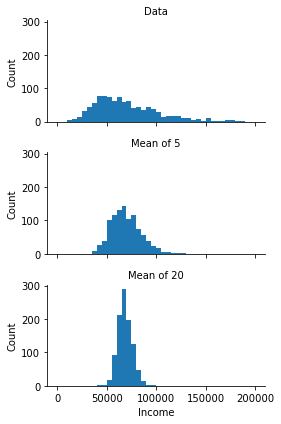

In [15]:
g = sns.FacetGrid(results, col='type', col_wrap=1,
                 height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

## The Bootstrap
One easy and effective way to estimate the sampling distribution of a statistic, or of
model parameters, is to draw additional samples, with replacement, from the sample
itself and recalculate the statistic or model for each resample

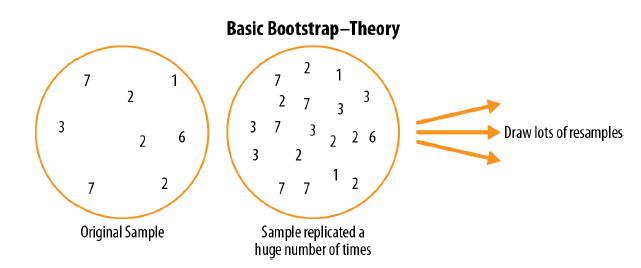
### Figure 2-7
The Idea of the bootstrap

The original estimate of the median is `$62,000`. The bootstrap distribution indicates
that the estimate has a bias of about. – `$70` and a standard error of `$209`. The results
will vary slightly between consecutive runs of the algorithm.

can be implemented using the scikit-learn method resample

In [16]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'orginal: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')


Bootstrap Statistics:
orginal: 62000.0
bias: -79.23449999999866
std. error: 220.13899913166193


A model might then be run on the bootstrapped data, for
example, to estimate the stability (variability) of model parameters, or to improve
predictive power. With classification and regression trees (also called decision trees),
running multiple trees on bootstrap samples and then averaging their predictions (or,
with classification, taking a majority vote) generally performs better than using a single tree.

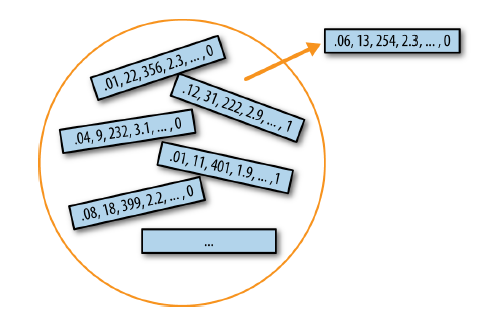
### Figure 2-8
Multivariate bootstarp sampling.

## Confidence Intervals

Confidence intervals always come with a coverage level, expressed as a (high) percentage,
say 90% or 95%. One way to think of a 90% confidence interval is as follows:
it is the interval that encloses the central 90% of the bootstrap sampling distribution
of a sample statistic
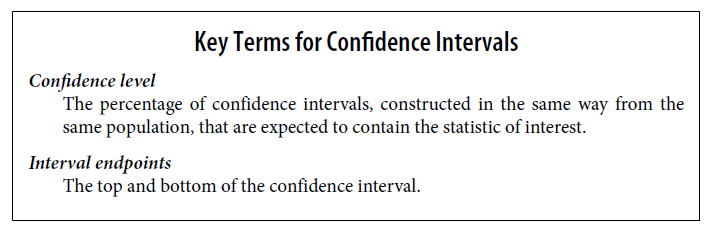
### Figure 2-9. 
Bootstrap confidence interval for the annual income of loan applicants,
based on a sample of 20

shows a 90% confidence interval for the mean annual income of loan
applicants, based on a sample of 20 for which the mean was $62,231.

68760.51844
55734.1


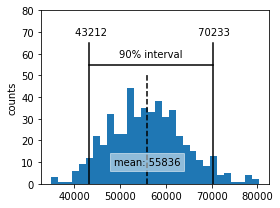

In [23]:
print(loans_income.mean())
np.random.seed(seed=3)
# Create a sample of 20 loan income data
sample20 =resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x: .0f}',
           horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('counts')

plt.tight_layout()
plt.show()
    

Given a sample of size n, and a sample statistic of interest, the algorithm for a bootstrap
confidence interval is as follows:
1. Draw a random sample of size n with replacement from the data (a resample).
2. Record the statistic of interest for the resample.
3. Repeat steps 1–2 many (R) times.
4. For an x% confidence interval, trim [(100-x) / 2]% of the R resample results from
either end of the distribution.
5. The trim points are the endpoints of an x% bootstrap confidence interval.

Text(0, 0.5, 'Counts')

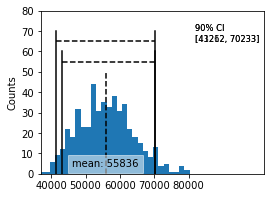

In [32]:
np.random.seed(seed=3)
# Create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)

results =[]
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3), color='C1')
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
ax.text(82000, 65,
       f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')

confidence_interval = list(results.quantile([0.025, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='black')
ax.text(82000, 65,
       f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')
# ax.text(sum(confidence_interval) / 2, 264, '95 % interval',
#            horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 5, f'mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
       horizontalalignment='center', verticalalignment='center')

ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
ax.set_ylabel('Counts')

#plt.tight_layout()
#plt.show()

## Normal Distribution


The bell-shaped normal distribution is iconic in traditional statistics.1 The fact that
distributions of sample statistics are often normally shaped has made it a powerful
tool in the development of mathematical formulas that approximate those
distributions.
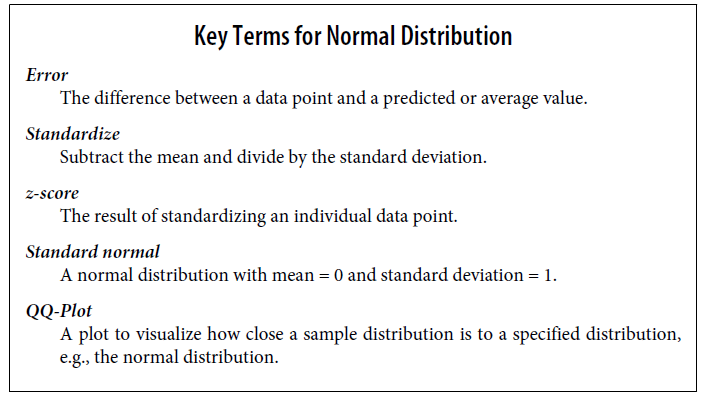

In a normal distribution (Figure 2-10), 68% of the data lies within one standard deviation
of the mean, and 95% lies within two standard deviations.
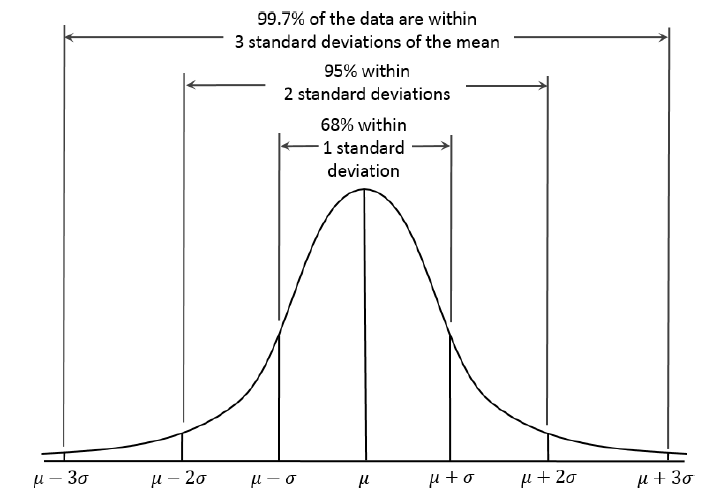
#### Figure 2-10. 
Normal curve

### Standard Normal and QQ-Plots
A standard normal distribution is one in which the units on the x-axis are expressed
in terms of standard deviations away from the mean

A QQ-Plot is used to visually determine how close a sample is to a specified distribution—
in this case, the normal distribution

The package scipy has the function(`scipy.stats.probplot`) to create QQ-plots. The argument `dist` specifies the distribution, which is set by default to the normal distribution.

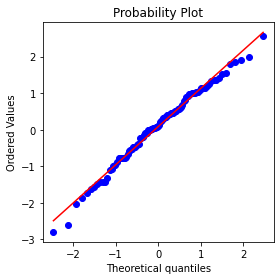

In [33]:
# Figure 2-11 Quantile of normal distribution
fig , ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

## Long-Tailed Distributions

Despite the importance of the normal distribution historically in statistics, and in
contrast to what the name would suggest, data is generally not normally distributed.
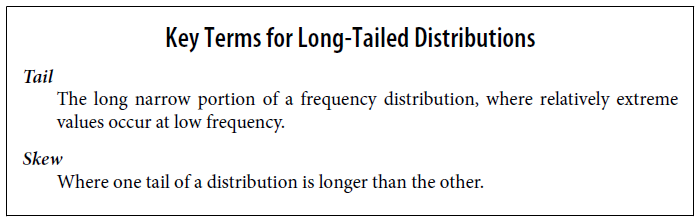

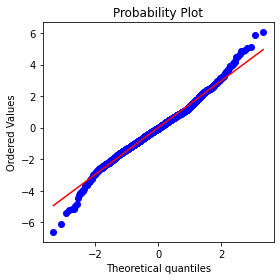

In [35]:
# Figure 2-12 QQ plot of the returns for netflix(NFLX)
sp500_px = pd.read_csv(SP500_DATA_CSV)

nflx = sp500_px.NFLX# NFLX mean to Netflix
nflx = np.diff(np.log(nflx[nflx>0]))

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()

## Student’s t-Distribution
The t-distribution is a normally shaped distribution, except that it is a bit thicker and
longer on the tails. It is used extensively in depicting distributions of sample statistics
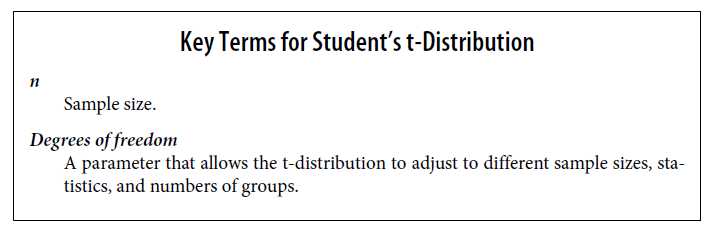
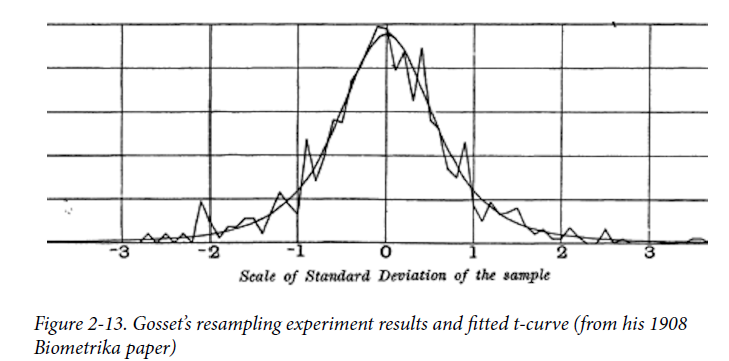

## Binominal Distribution
Yes/no (binomial) outcomes lie at the heart of analytics since they are often the culmination
of a decision or other process; buy/don’t buy, click/don’t click, survive/die,
and so on. Central to understanding the binomial distribution is the idea of a set of
trials, each trial having two possible outcomes with definite probabilities.

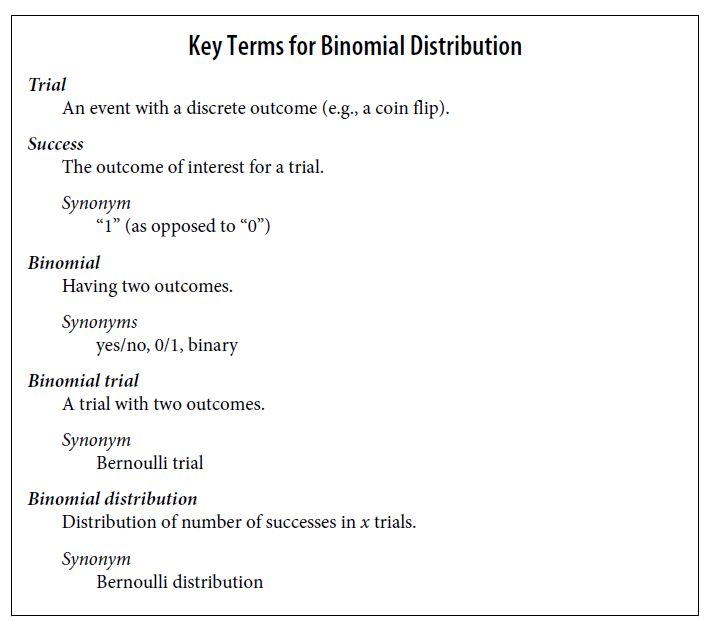

The scipy.stats module implements a large variety of statistical distributions. For
the binomial distribution, use the functions `stats.binom.pmf` and `stats.binom.cdf`

would return 0.0729, the probability of observing exactly x = 2 successes in size = 5
trials, where the probability of success for each trial is p = 0.1. For our example above,
we use x = 0, size = 200, and p = 0.02. With these arguments, dbinom returns a probability
of 0.0176.

In [36]:
print(stats.binom.pmf(2, n=5, p=0.1))

0.0729


This would return 0.9914, the probability of observing two or fewer successes in five
trials, where the probability of success for each trial is 0.1.

In [37]:
print(stats.binom.cdf(2, n=5, p=0.1))

0.99144


The mean of a binomial distribution is n × p; you can also think of this as the
expected number of successes in n trials, for success probability = p.
The variance is n × p 1 − p . With a large enough number of trials (particularly when
p is close to 0.50), the binomial distribution is virtually indistinguishable from the
normal distribution. In fact, calculating binomial probabilities with large sample sizes
is computationally demanding, and most statistical procedures use the normal distribution,
with mean and variance, as an approximation.

## Poisson and Related Distribution

### Poisson Distribution

This code will generate 100 random numbers from a Poisson distribution with `λ = 2`.
For example, if incoming customer service calls average two per minute, this code
will simulate 100 minutes, returning the number of calls in each of those 100 minutes.

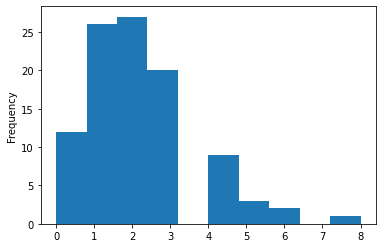

In [38]:
sample = stats.poisson.rvs(2, size=100) # The corresponding scipy function is stats.poisson.rvs

pd.Series(sample).plot.hist()
plt.show()

## Exponential Distribution

This code would generate 100 random numbers from an exponential distribution
where the mean number of events per time period is 0.2. So you could use it to simulate
100 intervals, in minutes, between service calls, where the average rate of incoming
calls is 0.2 per minute.

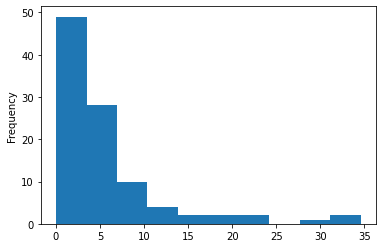

In [39]:
sample = stats.expon.rvs(scale=5, size=100)# In the function stats.expon.rvs, the order of the arguments is reversed.

pd.Series(sample).plot.hist()
plt.show()

## Weibull Distribution

For example,
the following code would generate 100 random numbers (lifetimes) from a Weibull
distribution with shape of 1.5 and characteristic life of 5,000:

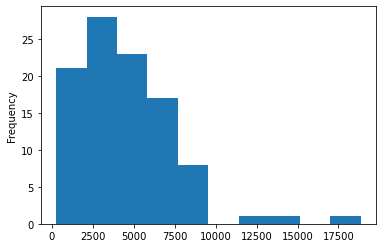

In [40]:
sample = stats.weibull_min.rvs(1.5, scale=5000, size=100)

pd.Series(sample).plot.hist()
plt.show()

shape parameter, β.
The symbol used is η, the Greek letter eta. It is also called the
scale parameter.
With the Weibull, the estimation task now includes estimation of both parameters, β
and η. Software is used to model the data and yield an estimate of the best-fitting
Weibull distribution.

## Summary
In the era of big data, the principles of random sampling remain important when
accurate estimates are needed. Random selection of data can reduce bias and yield a
higher quality data set than would result from just using the conveniently available
data. Knowledge of various sampling and data-generating distributions allows us to
quantify potential errors in an estimate that might be due to random variation. At the
same time, the bootstrap (sampling with replacement from an observed data set) is an
attractive “one size fits all” method to determine possible error in sample estimates.